# Frequency analysis

## Import libraries

To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import signal
# !pip install PyWavelets
import pywt

In [2]:
data = pd.read_excel('datasets/dataset.xlsx')
data

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,23899.1,2951.1,36442.2,38418.6,12414.9,3759.5,31001.4,52775.3
1,23917.7,3048.0,36463.8,38344.3,12448.1,3726.3,31032.4,52223.4
2,23984.9,3148.2,36525.1,39002.6,12520.4,3601.3,31103.2,53175.1
3,24016.8,3183.3,36551.5,39602.8,12548.5,3473.0,31133.2,54514.6
4,23960.3,3061.0,36494.8,39256.9,12475.6,3549.7,31061.9,54321.3
...,...,...,...,...,...,...,...,...
7115,23896.6,3893.1,37567.5,38276.6,11183.1,4515.5,31611.9,48532.8
7116,23850.2,3780.5,37514.3,38075.4,11119.7,4572.2,31551.9,48566.2
7117,23766.2,3644.2,37432.3,37477.1,11029.8,4755.0,31464.2,47165.5
7118,23768.4,3709.8,37443.6,37362.9,11048.4,4738.0,31481.5,46410.0


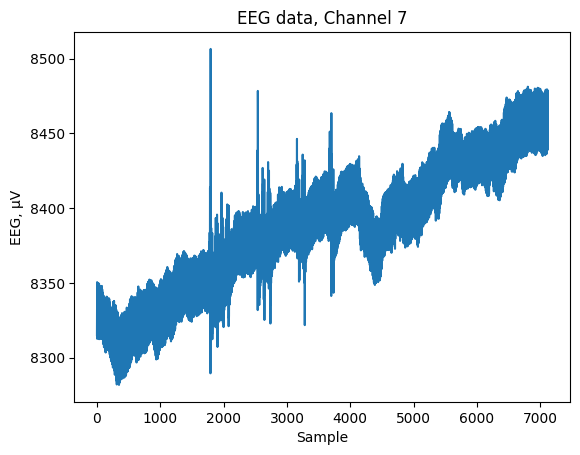

In [3]:
# select the data from the seventh channel
channel = 6
channel_data = data.iloc[:, channel]
channel_data = round(1000000*4.5*(channel_data/16777215),2)  # Convert data from ADC to µV

# plot the EEG data
plt.plot(channel_data)
plt.title("EEG data, Channel " + str(channel+1))
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

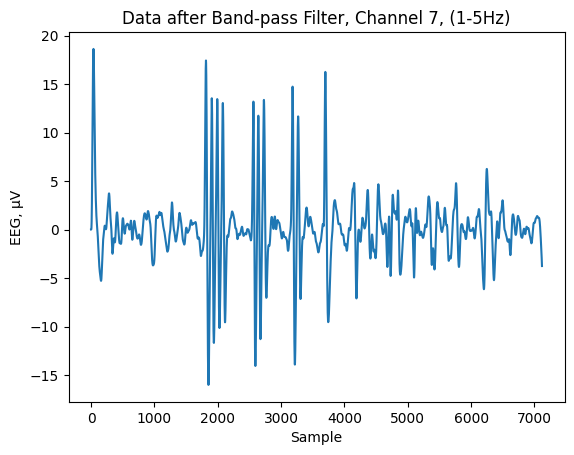

In [4]:
# Band Pass Filter
def butter_highpass_filter(data, cutoff, nyq, order=5):
    """Butterworth high-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

def butter_lowpass_filter(data, cutoff, nyq, order=5):
    """Butterworth low-pass filter.
    Args:
        data (array_like): data to be filtered.
        cutoff (float): cutoff frequency.
        order (int): order of the filter.
    Returns:
        array: filtered data."""
    normal_cutoff = cutoff / nyq  # normalized cutoff frequency
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

channel_data_bp_filtered = channel_data.copy()  # copy the data
fps = 250  # sampling frequency
cutoff_high = 1  # cutoff frequency of the high-pass filter
cutoff_low = 5  # cutoff frequency of the low-pass filter
nyq = 0.5 * fps  # Nyquist frequency (half of the sampling frequency)

# apply the band-pass filter
channel_data_bp_filtered = butter_highpass_filter(
    data=channel_data_bp_filtered,
    cutoff=cutoff_high,  # high-pass filter
    nyq=nyq,
    order=5)
channel_data_bp_filtered = butter_lowpass_filter(
    data=channel_data_bp_filtered,
    cutoff=cutoff_low,  # low-pass filter
    nyq=nyq,
    order=4)

plt.plot(channel_data_bp_filtered)
plt.title("Data after Band-pass Filter, Channel " +  str(channel+1) +", ("+str(cutoff_high)+"-"+str(cutoff_low) + "Hz)")
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

## Frequency analysis

Frequency analysis for EEG is a fundamental technique that unveils the distribution of different frequency components within the brain's electrical activity. This analysis involves the transformation of EEG signals from the time domain to the frequency domain, typically using the Fast Fourier Transform (FFT) algorithm. This transformation allows us to observe the intensity and prevalence of specific frequency bands, such as delta (0.5-4 Hz), theta (4-8 Hz), alpha (8-13 Hz), beta (13-30 Hz), and gamma (30-100 Hz) waves.

Each frequency band corresponds to distinct neural processes and cognitive states. For instance, delta waves are associated with deep sleep and unconsciousness, while alpha waves often indicate relaxed wakefulness. Beta waves are linked to active cognition and alertness, while gamma waves are connected to high-level information processing. Frequency analysis helps identify anomalies or irregularities in these patterns, aiding in the diagnosis of neurological conditions like epilepsy, sleep disorders, and cognitive impairments.
